In [22]:
import fitz
import pandas as pd

pdf = r"C:\Users\matsumoto_tkyk\OneDrive - カワソーテクセル株式会社\デスクトップ\ダイヘン.pdf"

def extract_and_transform_tables(pdf_path, start_page):
    """
    PDFからテーブルを抽出し、データフレームに変換します。

    :param pdf_path: PDFファイルのパス
    :param start_page: 開始ページ番号
    :return: テーブルを変換したデータフレームのリスト
    """
    doc = fitz.open(pdf_path)  # ドキュメントを開く
    extracted_dfs = []

    for page_num in range(start_page, doc.page_count + 1):
        page = doc[page_num - 1]  # ページ番号は0から始まるため、1を引く
        tables = page.find_tables()  # テーブルを検索

        if tables.tables:  # テーブルが見つかった場合
            table_data = tables[0].extract()
            columns = table_data[0]
            data_rows = table_data[1:]

            df = pd.DataFrame(data_rows, columns=columns)
            extracted_dfs.append(df)

    return extracted_dfs

#extract_and_transform_tables(path,0)

doc = fitz.open(pdf)  # ドキュメントを開く
extracted_dfs = []

tables = doc.find_tables()  # テーブルを検索

if tables.tables:  # テーブルが見つかった場合
    table_data = tables[0].extract()
    columns = table_data[0]
    data_rows = table_data[1:]

    df = pd.DataFrame(data_rows)
    extracted_dfs.append(df)

df

AttributeError: 'Document' object has no attribute 'find_tables'

C:\Users\matsumoto_tkyk\AppData\Local\Temp\ipykernel_17448\4112215168.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(table[1], kind='contour').show()


,0,1,2,3
0,入金区分,金 額,借 方 科 目\n貸 方 科 目,備 考
1,03\n振込,25960,1520\n1210\n- 1\n売 掛 金\n当座預金,


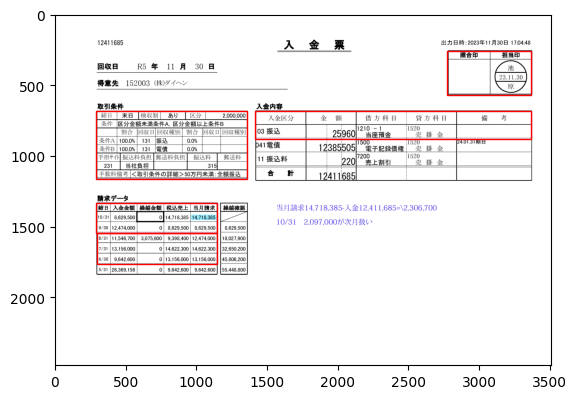

In [1]:
import camelot

pdf = r"C:\Users\matsumoto_tkyk\OneDrive - カワソーテクセル株式会社\デスクトップ\ダイヘン.pdf"

#table_areas = ("20, 190, 150, 300")
table = camelot.read_pdf(pdf)


camelot.plot(table[1], kind='contour').show()
table[1].df.__class__
table[1].df

C:\Users\matsumoto_tkyk\AppData\Local\Programs\Python\Python311\Lib\site-packages\camelot\parsers\stream.py:365: UserWarning: No tables found in table area 1
  warnings.warn(f"No tables found in table area {table_idx + 1}")
C:\Users\matsumoto_tkyk\AppData\Local\Temp\ipykernel_17448\2921808218.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(table[0], kind='contour').show()


,0
0,12411685


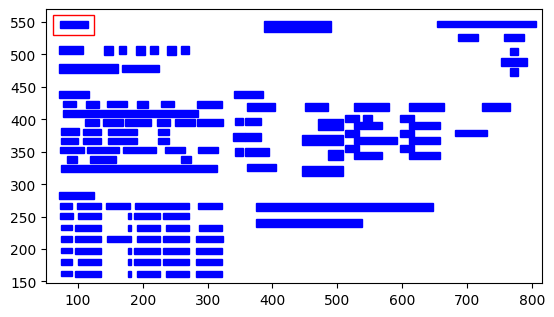

In [2]:
import camelot

pdf = r"C:\Users\matsumoto_tkyk\OneDrive - カワソーテクセル株式会社\デスクトップ\ダイヘン.pdf"

table_area = ["61, 560, 125, 530"]
table = camelot.read_pdf(pdf,flavor="stream",table_areas=table_area)


camelot.plot(table[0], kind='contour').show()
table[0].df.__class__
table[0].df

In [11]:
import camelot
import pandas as pd

pdf = r"C:\Users\matsumoto_tkyk\OneDrive - カワソーテクセル株式会社\デスクトップ\結合後.pdf"

table_area = ["70, 560, 120, 520"]
tables = camelot.read_pdf(pdf, flavor="stream",table_areas=table_area, pages="1-end")

dfs = [table.df for table in tables]
final_df = pd.concat(dfs, ignore_index=True)

print(final_df)

"""
camelot.plot(tables[0], kind='contour').show()
tables[0].df.__class__
tables[0].df
"""

C:\Users\matsumoto_tkyk\AppData\Local\Programs\Python\Python311\Lib\site-packages\camelot\parsers\stream.py:365: UserWarning: No tables found in table area 1
  warnings.warn(f"No tables found in table area {table_idx + 1}")


          0
0  12411685
1    465652
2    367400
3     31680
4     23540
5   1705000
6    180675


"\ncamelot.plot(tables[0], kind='contour').show()\ntables[0].df.__class__\ntables[0].df\n"